# Proyek Analisis Data: Brazilian E-Commerce Public Dataset
- **Nama:** Fakhri Sabran Yunansah
- **Email:** fakhri.yunansah@gmail.com
- **ID Dicoding:** fakhriyunansah

## Menentukan Pertanyaan Bisnis

1. How is the distribution of customers based on city and state, and which customers place orders most frequently?
2. How is the distribution of sellers based on city and state, and which sellers sell the most products?
3. Which product categories are ordered the most and the least?

## Import Semua Packages/Library yang Digunakan

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [78]:
customers_df = pd.read_csv('/content/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [79]:
orders_df = pd.read_csv('/content/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [80]:
order_items_df = pd.read_csv('/content/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [81]:
sellers_df = pd.read_csv('/content/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [82]:
products_df = pd.read_csv('/content/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [83]:
products_translate_df = pd.read_csv('/content/product_category_name_translation.csv')
products_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [84]:
#Performing a join between the two tables orders_df and customers_df
joined_df1 = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
print('Number of rows and columns in joined_df1:', joined_df1.shape)
joined_df1.head()

Number of rows and columns in joined_df1: (99441, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [85]:
#Performing a join between the four tables order_items_df, sellers_df, products_df, and products_translate_df
joined_df2 = pd.merge(
    pd.merge(
        order_items_df, sellers_df,
        how = "left", on='seller_id'
        ),
    pd.merge(
        products_df, products_translate_df,
        how = "left",
        on='product_category_name'
        ),
    how="left",
    on="product_id"
    )
print('Number of rows and columns in joined_df2:', joined_df2.shape)
joined_df2.head()

Number of rows and columns in joined_df2: (112650, 19)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


**Insight:**
- xxx
- xxx

### Assessing Data

In [86]:
#Checking for duplicate entries and viewing the information of the table joined_df1
print('Number of duplicate entries: ', joined_df1.duplicated().sum())
joined_df1.info()

Number of duplicate entries:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memo

In [87]:
#Checking the number of missing values in the table orders_df
joined_df1.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


In [88]:
#Melihat deskripsi statistik tabel joined_df1
joined_df1.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99281,97658,96476,99441,99441,99441.000000,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459,96096,NaN,4119,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96478,3,9,47,3,522,17,NaN,15540,41746
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58900.000000,NaN,NaN


In [89]:
#Checking for duplicate entries and viewing the information of the table joined_df2.
print('Number of duplicate entries: ', joined_df2.duplicated().sum())
joined_df2.info()

Number of duplicate entries:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   seller_zip_code_prefix         112650 non-null  int64  
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
 10  product_category_name          111047 non-null  object 
 11  product_name_lenght            111047 non-null  float64
 12

In [90]:
#Checking the number of missing values in the table joined_df2
joined_df2.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [91]:
#Viewing the statistical description of the table joined_df2
joined_df2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,112650.0,NaN,NaN,NaN,1.197834,0.705124,1.0,1.0,1.0,1.0,21.0
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,112650.0,NaN,NaN,NaN,120.653739,183.633928,0.85,39.9,74.99,134.9,6735.0
freight_value,112650.0,NaN,NaN,NaN,19.99032,15.806405,0.0,13.08,16.26,21.15,409.68
seller_zip_code_prefix,112650.0,NaN,NaN,NaN,24439.170431,27596.030909,1001.0,6429.0,13568.0,27930.0,99730.0
seller_city,112650,611,sao paulo,27983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,112650,23,SP,80342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
- xxx
- xxx

### Cleaning Data

In [92]:
#Capitalizing the first letter of each word in the column customer_city
city_name = []
for i in range(0, len(joined_df1["customer_city"])):
  a = " ".join([s.capitalize() if s.lower() not in "da|de|do|das|dos" else s for s in joined_df1["customer_city"][i].split()])
  city_name.append(a)

joined_df1["customer_city"] = pd.DataFrame(city_name)

In [93]:
#Capitalizing the first letter of each word in the column seller_city
seller_city_name = []
for i in range(0, len(joined_df2["seller_city"])):
  a = " ".join([s.capitalize() if s.lower() not in "da|de|do|das|dos" else s for s in joined_df2["seller_city"][i].split()])
  seller_city_name.append(a)

joined_df2["seller_city"] = pd.DataFrame(seller_city_name)

In [94]:
#Providing the full names for the columns customer_state and seller_state
state_name = {
"AC" : "Acre",
"AL" : "Alagoas",
"AM" : "Amazonas",
"AP" : "Amapa",
"BA" : "Bahia",
"CE" : "Ceara",
"DF" : "Distrito Federal",
"ES" : "Espirito Santo",
"GO" : "Goias",
"MA" : "Maranhao",
"MG" : "Minas Gerais",
"MS" : "Mato Grosso do Sul",
"MT" : "Mato Grosso",
"PA" : "Para",
"PB" : "Paraiba",
"PE" : "Pernambuco",
"PI" : "Piaui",
"PR" : "Parana",
"RJ" : "Rio de Janeiro",
"RN" : "Rio Grande do Norte",
"RO" : "Rondonia",
"RR" : "Roraima",
"RS" : "Rio Grande do Sul",
"SC" : "Santa Catarina",
"SE" : "Sergipe",
"SP" : "Sao Paulo",
"TO" : "Tocantins"
}

joined_df1['customer_state'] = joined_df1['customer_state'].map(state_name)
joined_df2['seller_state'] = joined_df2['seller_state'].map(state_name)
joined_df1[['customer_city','customer_state']].head()

,customer_city,customer_state
0,Sao Paulo,Sao Paulo
1,Barreiras,Bahia
2,Vianopolis,Goias
3,Sao Goncalo do Amarante,Rio Grande do Norte
4,Santo Andre,Sao Paulo


In [95]:
joined_df2[['seller_city','seller_state']].head()

,seller_city,seller_state
0,Volta Redonda,Sao Paulo
1,Sao Paulo,Sao Paulo
2,Borda da Mata,Minas Gerais
3,Franca,Sao Paulo
4,Loanda,Parana


In [96]:
#Renaming the date columns as needed for a more concise representation
joined_df1 = joined_df1.rename(columns={"order_purchase_timestamp": "order_date",
                                        "order_approved_at": "approved_date",
                                        "order_delivered_carrier_date": "shipped_date",
                                        "order_delivered_customer_date": "delivery_date"}
                               )

In [97]:
#Removing the unnecessary column 'customer_zip_code_prefix'
joined_df1 = joined_df1.drop(columns= ['customer_zip_code_prefix','order_estimated_delivery_date'], axis=1)

In [98]:
#Converting the data type from objects to datetime using a for loop
dt_columns = ['order_date', 'approved_date', 'shipped_date', 'delivery_date']

for column in dt_columns:
  joined_df1[column] = pd.to_datetime(joined_df1[column])

joined_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            99441 non-null  object        
 1   customer_id         99441 non-null  object        
 2   order_status        99441 non-null  object        
 3   order_date          99441 non-null  datetime64[ns]
 4   approved_date       99281 non-null  datetime64[ns]
 5   shipped_date        97658 non-null  datetime64[ns]
 6   delivery_date       96476 non-null  datetime64[ns]
 7   customer_unique_id  99441 non-null  object        
 8   customer_city       99441 non-null  object        
 9   customer_state      99441 non-null  object        
dtypes: datetime64[ns](4), object(6)
memory usage: 7.6+ MB


In [99]:
print("Number of NaN values in the column pada kolom 'product_category_name_english':", joined_df2.product_category_name_english.isnull().sum())
print("Number of NaN values in the column 'product_category_name_english', but not NaN in the column 'product_category_name':",
      joined_df2.product_category_name_english.loc[joined_df2.product_category_name_english.isna() &
                                                   joined_df2.product_category_name.notnull()].isnull().sum())

#Melihat nilai unik pada kolom 'product_category_name' yang tidak memiliki nilai pada kolom 'product_category_name_english'
joined_df2.product_category_name.loc[joined_df2.product_category_name_english.isna() & joined_df2.product_category_name.notnull()].unique()

Number of NaN values in the column pada kolom 'product_category_name_english': 1627
Number of NaN values in the column 'product_category_name_english', but not NaN in the column 'product_category_name': 24


array(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype=object)

In [100]:
joined_df2[['product_category_name','product_category_name_english']].loc[joined_df2.product_category_name.isna()].reset_index()

,index,product_category_name,product_category_name_english
0,123,NaN,NaN
1,125,NaN,NaN
2,132,NaN,NaN
3,142,NaN,NaN
4,171,NaN,NaN
...,...,...,...
1598,112306,NaN,NaN
1599,112333,NaN,NaN
1600,112350,NaN,NaN
1601,112438,NaN,NaN


In [101]:
#Looping through the list index resulting from slicing and filling missing values based on the condition from the column product_category_name
for i in list(joined_df2.loc[joined_df2.product_category_name_english.isna()].index):
  if joined_df2['product_category_name'].iloc[i] == 'pc_gamer':
    joined_df2['product_category_name_english'].iloc[i] = 'pc_gaming'
  elif joined_df2['product_category_name'].iloc[i] == 'portateis_cozinha_e_preparadores_de_alimentos':
    joined_df2['product_category_name_english'].iloc[i] = 'portable_kitchen_and_food_preparers'
  else:
    joined_df2['product_category_name_english'].iloc[i] = 'other_products' #The entries still missing values in this column are named other_products


Streaming output truncated to the last 5000 lines.
<ipython-input-101-2432f383a75c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df2['product_category_name_english'].iloc[i] = 'other_products' #The entries still missing values in this column are named other_products
<ipython-input-101-2432f383a75c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df2['product_category_name_english'].iloc[i] = 'other_products' #The entries still missing values in this column are named other_products
<ipython-input-101-2432f383a75c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [102]:
'''
Correcting the formatting of the column product_category_name_english by removing the '_' separator and
capitalizing the first letter of each word and assigning it to a new column named product_category
'''
category_name = []
for i in range(0, len(joined_df2["product_category_name_english"])):
  a = " ".join([s.capitalize() if s.lower() != "and" else s for s in joined_df2["product_category_name_english"][i].split("_")])
  category_name.append(a)

joined_df2["product_category"] = pd.DataFrame(category_name)
joined_df2[["product_category_name_english","product_category"]].head()

,product_category_name_english,product_category
0,cool_stuff,Cool Stuff
1,pet_shop,Pet Shop
2,furniture_decor,Furniture Decor
3,perfumery,Perfumery
4,garden_tools,Garden Tools


In [103]:
#Checking the number of missing values
joined_df2.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [104]:
#Menghapus kolom yang tidak dibutuhkan dan mengecek kembali jumlah missing value
joined_df2 = joined_df2.drop(joined_df2.columns[[4,7]] ,axis=1).drop(joined_df2.iloc[:, 10:19] ,axis=1)
joined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   freight_value     112650 non-null  float64
 6   seller_city       112650 non-null  object 
 7   seller_state      112650 non-null  object 
 8   product_category  112650 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.7+ MB


In [105]:
#Merging all tables into all_joined_df
all_joined_df = pd.merge(
    left=joined_df1,
    right=joined_df2,
    how="right",
    left_on="order_id",
    right_on="order_id"
)
print('Number of rows and columns all_joined_df:', all_joined_df.shape)
all_joined_df.head()

Number of rows and columns all_joined_df: (112650, 18)


,order_id,customer_id,order_status,order_date,approved_date,shipped_date,delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,Campos dos Goytacazes,Rio de Janeiro,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,Volta Redonda,Sao Paulo,Cool Stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,Santa Fe do Sul,Sao Paulo,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,Sao Paulo,Sao Paulo,Pet Shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,Para de Minas,Minas Gerais,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Borda da Mata,Minas Gerais,Furniture Decor
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,Atibaia,Sao Paulo,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,Franca,Sao Paulo,Perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,Varzea Paulista,Sao Paulo,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,Loanda,Parana,Garden Tools


In [106]:
#Adding a new column named total_order_value, resulting from the sum of the columns price and freight_value, positioned at the index after these two columns
all_joined_df.insert(15, "total_order_value", all_joined_df.price + all_joined_df.freight_value)

In [107]:
#Viewing the column information of the table all_joined_df
all_joined_df.info()
print('\nJumlah missing value all_joined_df:\n', all_joined_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            112650 non-null  object        
 1   customer_id         112650 non-null  object        
 2   order_status        112650 non-null  object        
 3   order_date          112650 non-null  datetime64[ns]
 4   approved_date       112635 non-null  datetime64[ns]
 5   shipped_date        111456 non-null  datetime64[ns]
 6   delivery_date       110196 non-null  datetime64[ns]
 7   customer_unique_id  112650 non-null  object        
 8   customer_city       112650 non-null  object        
 9   customer_state      112650 non-null  object        
 10  order_item_id       112650 non-null  int64         
 11  product_id          112650 non-null  object        
 12  seller_id           112650 non-null  object        
 13  price               112650 no

In [108]:
#Viewing the unique count of order_status
all_joined_df.order_status.value_counts()

,count
order_status,
delivered,110197
shipped,1185
canceled,542
invoiced,359
processing,357
unavailable,7
approved,3


In [109]:
#Removing rows from all_joined_df that contain the values 'canceled' and 'unavailable' in the column order_status
all_joined_df = all_joined_df.drop(all_joined_df[all_joined_df['order_status'].isin(['canceled', 'unavailable'])].index)
all_joined_df.sample(5)

,order_id,customer_id,order_status,order_date,approved_date,shipped_date,delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,total_order_value,seller_city,seller_state,product_category
80702,b78ba6ceb060e6cc64b1f92a95c42505,9f0572207530663fed60cf042b2419ee,delivered,2018-02-12 18:08:54,2018-02-12 18:15:21,2018-02-19 23:52:20,2018-02-22 19:39:13,c25c0de4341701c95fb2675d9d82d414,Curitiba,Parana,1,cd46a885543f0e169a49f1eb25c04e43,710e3548e02bc1d2831dfc4f1b5b14d4,99.99,14.43,114.42,Rolandia,Parana,Computers Accessories
78004,b17d1971fecd03b2f511cbf6cfab681e,933c4bfb97a8cdf9711b9d4fb70e38a6,delivered,2018-06-08 13:50:54,2018-06-08 15:31:38,2018-06-13 12:51:00,2018-06-29 21:44:49,ea1bca6d388490f8f4ceb90ec9127c57,Videira,Santa Catarina,1,2de5c479fb0c490a0f2a2f3ab36e71b6,dfc5fb7259bb2b599ca565e6e9448f0f,174.99,23.80,198.79,Sao Bernardo do Campo,Sao Paulo,Garden Tools
12432,1c2fb7f84aa77300fcb6b698481c1e2e,169e46bb9d6c7e98ad722850e21e4c4b,delivered,2017-12-12 11:02:24,2017-12-12 11:12:19,2017-12-13 21:47:45,2017-12-22 20:42:09,cc459e4c17af00c66948ad9d3384369d,Manhuacu,Minas Gerais,1,dc4adbe80b638fa8ed7ce4d2822e05af,5f2684dab12e59f83bef73ae57724e45,119.90,21.33,141.23,Sao Paulo,Sao Paulo,Toys
14017,1fed2f02e296e7767a2eea3dc76f69bb,e2dfdb0818021b6bbc677390b9c42674,delivered,2018-07-22 12:50:04,2018-07-23 11:31:25,2018-07-23 13:09:00,2018-07-27 17:40:33,6299e5458d9866aa5f444cbbcf8462dc,Osasco,Sao Paulo,1,8562e2c780a345b609e1b802d7e3e4ae,8160255418d5aaa7dbdc9f4c64ebda44,79.90,14.87,94.77,Ibitinga,Sao Paulo,Bed Bath Table
39043,58b67f446540a1c1819147153c99297c,4b275d19c7abd9fc3d9904b0607d169a,delivered,2018-02-11 13:41:56,2018-02-11 13:55:20,2018-02-16 19:57:06,2018-03-04 18:36:26,bcfd923b7801435849731bd1c60509a6,Sao Paulo,Sao Paulo,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90,13.37,63.27,Sao Jose do Rio Preto,Sao Paulo,Garden Tools


In [110]:
#Viewing the unique count of order_status
all_joined_df.order_status.value_counts()

,count
order_status,
delivered,110197
shipped,1185
invoiced,359
processing,357
approved,3


In [111]:
#Checking the number of missing values in all_joined_df after dropping rows with order_status 'canceled' and 'unavailable'
all_joined_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_date,0
approved_date,15
shipped_date,721
delivery_date,1912
customer_unique_id,0
customer_city,0
customer_state,0


In [112]:
#Creating a new column using the order_date column from all_joined_df
all_joined_df.insert(3,'hour_order', all_joined_df['order_date'].apply(lambda x: x.hour)) #insert kolom 'hour_order' di index ke-3

hours_bins = [-0.1, 6, 12, 18, 23] #Membagi kolom hour_order ke dalam beberapa bagian
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
all_joined_df.insert(4,'daytime_order', (pd.cut(all_joined_df['hour_order'], hours_bins, labels=hours_labels))) #insert kolom 'daytime_order' di index ke-4

all_joined_df.insert(5,'day_order', all_joined_df['order_date'].dt.strftime('%A')) #insert kolom 'day_order' di index ke-5
all_joined_df.insert(6,'date_order', all_joined_df['order_date'].dt.strftime('%d')) #insert kolom 'date_order' di index ke-6
all_joined_df.insert(7,'month_order', all_joined_df['order_date'].dt.strftime('%m-%Y')) #insert kolom 'month_order' di index ke-7

all_joined_df.sample(10)

,order_id,customer_id,order_status,hour_order,daytime_order,day_order,date_order,month_order,order_date,approved_date,...,customer_state,order_item_id,product_id,seller_id,price,freight_value,total_order_value,seller_city,seller_state,product_category
63809,91be51c856a90d7efe86cf9d082d6ae3,637321037fb8b34323ce7fd8aab4a0f1,delivered,15,Afternoon,Tuesday,12,06-2018,2018-06-12 15:58:03,2018-06-12 16:32:26,...,Sao Paulo,1,73bcea4312cb31d72bffc6562f7f7c71,da7039f29f90ce5b4846ffc0fcc93beb,122.90,19.17,142.07,Santo Andre,Sao Paulo,Cine Photo
86730,c502981c13af31e66327c143bc885a2d,f7cb015ff73be957ee6a30e2577742c5,delivered,14,Afternoon,Thursday,31,05-2018,2018-05-31 14:38:55,2018-06-05 04:51:47,...,Rio de Janeiro,1,71540d636652fc682032d3b3c0a180c1,213b25e6f54661939f11710a6fddb871,113.85,23.38,137.23,Salto,Sao Paulo,Home Construction
24815,388241639571ce95ace22e76655719f9,c15fab5c4434b79b5646efd43c6e4cde,delivered,23,Night,Tuesday,15,05-2018,2018-05-15 23:32:20,2018-05-15 23:54:24,...,Sao Paulo,1,8562e2c780a345b609e1b802d7e3e4ae,8160255418d5aaa7dbdc9f4c64ebda44,79.90,9.46,89.36,Ibitinga,Sao Paulo,Bed Bath Table
33841,4c9904554ffe76f9b6ec64bd4e266778,961550c2d5a8c8f344f070cd57768e1c,delivered,22,Night,Thursday,03,08-2017,2017-08-03 22:55:21,2017-08-03 23:10:14,...,Parana,1,6daadc7e6029cf01762f941e488caa1b,46dc3b2cc0980fb8ec44634e21d2718e,299.99,18.35,318.34,Rio de Janeiro,Rio de Janeiro,Toys
87154,c5e44ccca834721d269f1227236ae8be,c9d717c837919bc6ee17ffab4ccbb3e8,delivered,11,Morning,Friday,13,07-2018,2018-07-13 11:05:00,2018-07-13 11:15:22,...,Ceara,1,4697e1b622324d38a8989bff2bdc1c84,1da3aeb70d7989d1e6d9b0e887f97c23,19.99,19.05,39.04,Sao Paulo,Sao Paulo,Stationery
88840,c9cf1b341e0a14fb94022101fa6c4604,56005e0bc41d31584c17a913251a676f,delivered,11,Morning,Monday,14,05-2018,2018-05-14 11:06:13,2018-05-14 11:15:29,...,Rio Grande do Sul,1,fb5dcf669bb92534be46c2fef1131651,f27e33c6d29b5138fa9967bcd445b6d5,129.00,18.48,147.48,Sao Paulo,Sao Paulo,Fixed Telephony
6345,0e685171210978ef27d06f208612c8be,6ae2c74898e63a9bcb85e3107799b4f4,delivered,22,Night,Thursday,24,08-2017,2017-08-24 22:02:10,2017-08-26 02:05:57,...,Rio de Janeiro,1,b2b938c46aafdbf702d73e7edb9cb263,f8db351d8c4c4c22c6835c19a46f01b0,22.90,15.10,38.00,Salto,Sao Paulo,Pet Shop
110934,fc0cb35623426de0611d0d45c4ba4f04,4cc0feb813529048d5f404e4ab50d1ba,delivered,11,Morning,Saturday,12,05-2018,2018-05-12 11:15:34,2018-05-15 04:35:06,...,Sao Paulo,1,17f221c334109f71ffc36e54fc32a836,34056b8b55c1775a22af2331670a799c,64.80,12.89,77.69,Penapolis,Sao Paulo,Auto
37626,555e60e282181725debc9eb2d69fda3f,1d1300e5823331f1065112a2a6aa5b19,delivered,14,Afternoon,Tuesday,05,06-2018,2018-06-05 14:55:04,2018-06-06 14:53:47,...,Sao Paulo,1,79c716797a31592b8dbe45b2a93a835f,f262cbc1c910c83959f849465454ddd3,11.99,7.39,19.38,Sao Paulo,Sao Paulo,Stationery
77306,aff844f049f48f38df9885eb70f0d8a6,6b7969d190ac818f1e34f6a15aaff4c1,delivered,11,Morning,Friday,30,06-2017,2017-06-30 11:15:06,2017-07-01 05:05:23,...,Minas Gerais,1,7c1bd920dbdf22470b68bde975dd3ccf,cc419e0650a3c5ba77189a1882b7556a,54.99,17.63,72.62,Santo Andre,Sao Paulo,Health Beauty


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Customer Characteristics

In [113]:
#Viewing the number of customers by customer_city
customers_in_cities = all_joined_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_in_cities = customers_in_cities.rename(columns={'customer_unique_id':'count_customers'}).head(10)
customers_in_cities

,customer_city,count_customers
0,Sao Paulo,14761
1,Rio de Janeiro,6545
2,Belo Horizonte,2641
3,Brasilia,2051
4,Curitiba,1447
5,Campinas,1379
6,Porto Alegre,1317
7,Salvador,1199
8,Guarulhos,1133
9,Sao Bernardo do Campo,891


In [114]:
#Viewing the number of customers by customer_state
customers_in_states = all_joined_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_in_states = customers_in_states.rename(columns={'customer_unique_id':'count_customers'}).head(10)
customers_in_states

,customer_state,count_customers
0,Sao Paulo,39747
1,Rio de Janeiro,12241
2,Minas Gerais,11134
3,Rio Grande do Sul,5233
4,Parana,4824
5,Santa Catarina,3501
6,Bahia,3244
7,Distrito Federal,2057
8,Espirito Santo,1950
9,Goias,1934


In [115]:
#Viewing the customers with the highest total order value
sum_order = all_joined_df.groupby(by="customer_unique_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
sum_order_sorted = sum_order.sort_values(by='sum_order_value', ascending=False).head(10)
sum_order_sorted

,customer_unique_id,count_order,sum_order_value
3788,0a0a92112bd4c708ca5fde585afaa872,1,13664.08
81011,da122df9eeddfedc1dc1f5349a1a690c,2,7571.63
43938,763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88
81850,dc4802a71eae9be1dd28f5d788ceb526,1,6929.31
25901,459bef486812aa25204be022145caa62,1,6922.21
94696,ff4159b92c40ebe40454e3e6a7c35ed6,1,6726.66
23841,4007669dec559734d6f53e029e360987,1,6081.54
88651,eebb5dda148d3893cdaf5b5ca3040ccb,1,4764.34
27124,48e1ac109decbb87765a3eade6854098,1,4681.78
74401,c8460e4251689ba205045f3ea17884a1,4,4655.88


In [116]:
#Viewing the customers who place orders most frequently
count_order = all_joined_df.groupby(by="customer_unique_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
count_order_sorted = count_order.sort_values(by=['count_order','sum_order_value'], ascending=False).head(10)
count_order_sorted

,customer_unique_id,count_order,sum_order_value
52352,8d50f5eadf50201ccdcedfb9e2ac8455,16,902.04
23198,3e43e6105506432c953e165fb2acf44c,9,1172.67
75205,ca77025e7201e3b30c44b472ff346268,7,1122.72
10234,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01
37370,6469f99c1f9dfae7733b25662e7f1782,7,758.83
81925,dc813062e0fc23409cd255f7f53c7074,6,1033.62
26733,47c1a3033b8b77b3ab6e109eb4d5fdf3,6,944.21
37161,63cfc61cee11cbe306bff5857d00bfe4,6,826.32
89402,f0e310a6839dce9de1638e0fe5ab282a,6,540.69
7091,12f5d6e1cbf93dafd9dcc19095df0b3d,6,110.72


### Seller Characteristics

In [117]:
#Viewing the number of sellers by seller_city
sellers_in_cities = all_joined_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_in_cities = sellers_in_cities.rename(columns={'seller_id':'count_sellers'}).head(10)
sellers_in_cities

,seller_city,count_sellers
0,Sao Paulo,683
1,Curitiba,126
2,Rio de Janeiro,96
3,Belo Horizonte,65
4,Ribeirao Preto,52
5,Guarulhos,50
6,Ibitinga,49
7,Santo Andre,45
8,Campinas,40
9,Maringa,40


In [118]:
#Viewing the number of sellers by seller_state
sellers_in_states = all_joined_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_in_states = sellers_in_states.rename(columns={'seller_id':'count_sellers'}).head(10)
sellers_in_states

,seller_state,count_sellers
0,Sao Paulo,1822
1,Parana,344
2,Minas Gerais,240
3,Santa Catarina,186
4,Rio de Janeiro,170
5,Rio Grande do Sul,129
6,Goias,40
7,Distrito Federal,30
8,Espirito Santo,23
9,Bahia,19


In [119]:
#Viewing the sellers with the highest total order value
seller_sum_order = all_joined_df.groupby(by="seller_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
seller_sum_order_sorted = seller_sum_order.sort_values(by='sum_order_value', ascending=False).head(10)
seller_sum_order_sorted

,seller_id,count_order,sum_order_value
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,249393.44
1515,7c67e1448b00f6e969d365cea6b010ab,982,239536.44
1000,53243585a1d6dc2643021fd1853d8905,358,235856.68
873,4a3ca9315b744ce9f8e9374361493884,1804,235359.30
2984,fa1c13f2614d7b5c4749cbc52fecda94,584,202861.67
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,185192.32
1540,7e93a43ef30c4f03f38b393420bc753a,332,178838.42
191,1025f0e2d44d7041d6cf58b6550e0bfa,915,172860.69
1485,7a67c85e85bb2ce8582c35f2203ad736,1159,162607.24
1799,955fee9216a65b617aa5c0531780ce60,1286,160582.90


In [120]:
#Viewing the sellers who receive the most orders
seller_count_order = all_joined_df.groupby(by="seller_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
seller_count_order_sorted = seller_count_order.sort_values(by=['count_order','sum_order_value'], ascending=False).head(10)
seller_count_order_sorted

,seller_id,count_order,sum_order_value
1219,6560211a19b47992c3666cc44a7e94c0,1847,150522.02
873,4a3ca9315b744ce9f8e9374361493884,1804,235359.30
2451,cc419e0650a3c5ba77189a1882b7556a,1697,129169.95
366,1f50f920176fa81dab994f9023523100,1403,142037.48
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,185192.32
1799,955fee9216a65b617aa5c0531780ce60,1286,160582.90
1485,7a67c85e85bb2ce8582c35f2203ad736,1159,162607.24
2800,ea8482cd71df3c1969d7b9473ff13abc,1145,54684.52
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,249393.44
724,3d871de0142ce09b7081e2b9d1733cb1,1076,116835.80


### Customer orders by product category

In [121]:
#Viewing the product categories with the highest number of orders
order_by_product_category = all_joined_df.groupby(by="product_category").agg(num_of_order = ('order_id','count'), sum_order_value = ('total_order_value', 'sum')).reset_index()
order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10)

,product_category,num_of_order,sum_order_value
7,Bed Bath Table,11097,1240386.13
43,Health Beauty,9634,1437665.78
68,Sports Leisure,8590,1147244.63
39,Furniture Decor,8298,899626.04
15,Computers Accessories,7781,1050941.58
49,Housewares,6915,772035.14
73,Watches Gifts,5970,1298292.47
71,Telephony,4527,393306.02
42,Garden Tools,4328,579525.20
5,Auto,4204,678606.64


In [122]:
#Viewing the product categories with the lowest number of orders
order_by_product_category.sort_values('num_of_order', ascending=True).head(10) #Menyortir nilai terendah

,product_category,num_of_order,sum_order_value
64,Security and Services,2,324.51
60,Pc Gaming,8,1430.10
29,Fashion Childrens Clothes,8,665.36
52,La Cuisine,14,2388.54
63,Portable Kitchen and Food Preparers,14,4228.05
11,Cds Dvds Musicals,14,954.99
3,Arts and Craftmanship,24,2184.14
46,Home Comfort 2,30,1170.58
32,Fashion Sport,30,2697.64
35,Flowers,33,1598.91


In [123]:
#Viewing the product categories with the highest total order value
order_by_product_category.sort_values('sum_order_value', ascending=False).head(10) #Sorting by highest value

,product_category,num_of_order,sum_order_value
43,Health Beauty,9634,1437665.78
73,Watches Gifts,5970,1298292.47
7,Bed Bath Table,11097,1240386.13
68,Sports Leisure,8590,1147244.63
15,Computers Accessories,7781,1050941.58
39,Furniture Decor,8298,899626.04
49,Housewares,6915,772035.14
20,Cool Stuff,3779,704086.24
5,Auto,4204,678606.64
42,Garden Tools,4328,579525.20


In [124]:
#Viewing the product categories with the lowest total order value
order_by_product_category.sort_values('sum_order_value', ascending=True).head(10)

,product_category,num_of_order,sum_order_value
64,Security and Services,2,324.51
29,Fashion Childrens Clothes,8,665.36
11,Cds Dvds Musicals,14,954.99
46,Home Comfort 2,30,1170.58
60,Pc Gaming,8,1430.10
35,Flowers,33,1598.91
23,Diapers and Hygiene,38,2101.25
3,Arts and Craftmanship,24,2184.14
52,La Cuisine,14,2388.54
32,Fashion Sport,30,2697.64


### Characteristics and Development of Customer Orders

In [125]:
count_hour_order = all_joined_df.groupby('hour_order').order_id.nunique().reset_index()
count_hour_order = count_hour_order.rename(columns={'order_id':'count_orders'})
count_hour_order

,hour_order,count_orders
0,0,2362
1,1,1151
2,2,503
3,3,267
4,4,205
5,5,185
6,6,493
7,7,1218
8,8,2939
9,9,4712


In [145]:
#Customer orders by order time
count_daytime_order = all_joined_df.groupby('daytime_order', observed=False).order_id.nunique().reset_index()
count_daytime_order = count_daytime_order.rename(columns={'order_id':'count_orders'})
count_daytime_order

,daytime_order,count_orders
0,Dawn,5166
1,Morning,27367
2,Afternoon,37664
3,Night,28002


In [127]:
#Customer orders by order day
day_order_df = all_joined_df.groupby('day_order').order_id.nunique().reset_index().sort_values(by='order_id', ascending=False)
day_order_df = day_order_df.rename(columns={'order_id':'count_orders'})
day_order_df

,day_order,count_orders
1,Monday,15978
5,Tuesday,15758
6,Wednesday,15350
4,Thursday,14571
0,Friday,13948
3,Sunday,11831
2,Saturday,10763


In [146]:
# Customer orders by order time and day
count_time_order = all_joined_df.groupby(['day_order', 'daytime_order'], observed=False).order_id.nunique().reset_index()
count_time_order.insert(2, 'time_order', count_time_order[['day_order', 'daytime_order']].agg(', '.join, axis=1))
count_time_order = count_time_order.rename(columns={'order_id': 'count_orders'})
count_time_order.sort_values(by='count_orders', ascending=False)

,day_order,daytime_order,time_order,count_orders
6,Monday,Afternoon,"Monday, Afternoon",6124
22,Tuesday,Afternoon,"Tuesday, Afternoon",6066
26,Wednesday,Afternoon,"Wednesday, Afternoon",5837
18,Thursday,Afternoon,"Thursday, Afternoon",5587
2,Friday,Afternoon,"Friday, Afternoon",5390
7,Monday,Night,"Monday, Night",4742
23,Tuesday,Night,"Tuesday, Night",4536
25,Wednesday,Morning,"Wednesday, Morning",4522
14,Sunday,Afternoon,"Sunday, Afternoon",4483
21,Tuesday,Morning,"Tuesday, Morning",4466


In [129]:
count_date_order = all_joined_df.groupby('date_order').order_id.nunique().reset_index()
count_date_order = count_date_order.rename(columns={'order_id':'count_orders'})
count_date_order.sort_values(by='count_orders', ascending=False)

,date_order,count_orders
23,24,3835
15,16,3546
14,15,3485
3,04,3449
5,06,3408
17,18,3405
4,05,3388
13,14,3345
18,19,3340
6,07,3313


In [130]:
#Viewing the development of the number of orders and total order value from month to month
monthly_orders = all_joined_df.resample(rule='M', on='order_date').agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value','sum')).reset_index()
monthly_orders = monthly_orders.rename(columns ={"order_date":"month_order"})
monthly_orders.month_order = monthly_orders.month_order.dt.strftime('%Y-%m')
monthly_orders

,month_order,count_order,sum_order_value
0,2016-09,2,279.69
1,2016-10,290,51354.52
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,787,136943.46
5,2017-02,1718,283561.69
6,2017-03,2617,425617.96
7,2017-04,2377,405848.61
8,2017-05,3640,582710.83
9,2017-06,3205,499652.24


## Visualization & Explanatory Analysis

In [131]:
#Creating a function to assign a specific color to the data with the maximum value
def set_custom_palette(series, max_color = '#3187d4', other_color = '#b3bcc4'):
    max_value = series.max()
    pal = []

    for item in series:
        if item == max_value:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

### What is the distribution of customers by city and state, and which customer places orders most frequently?

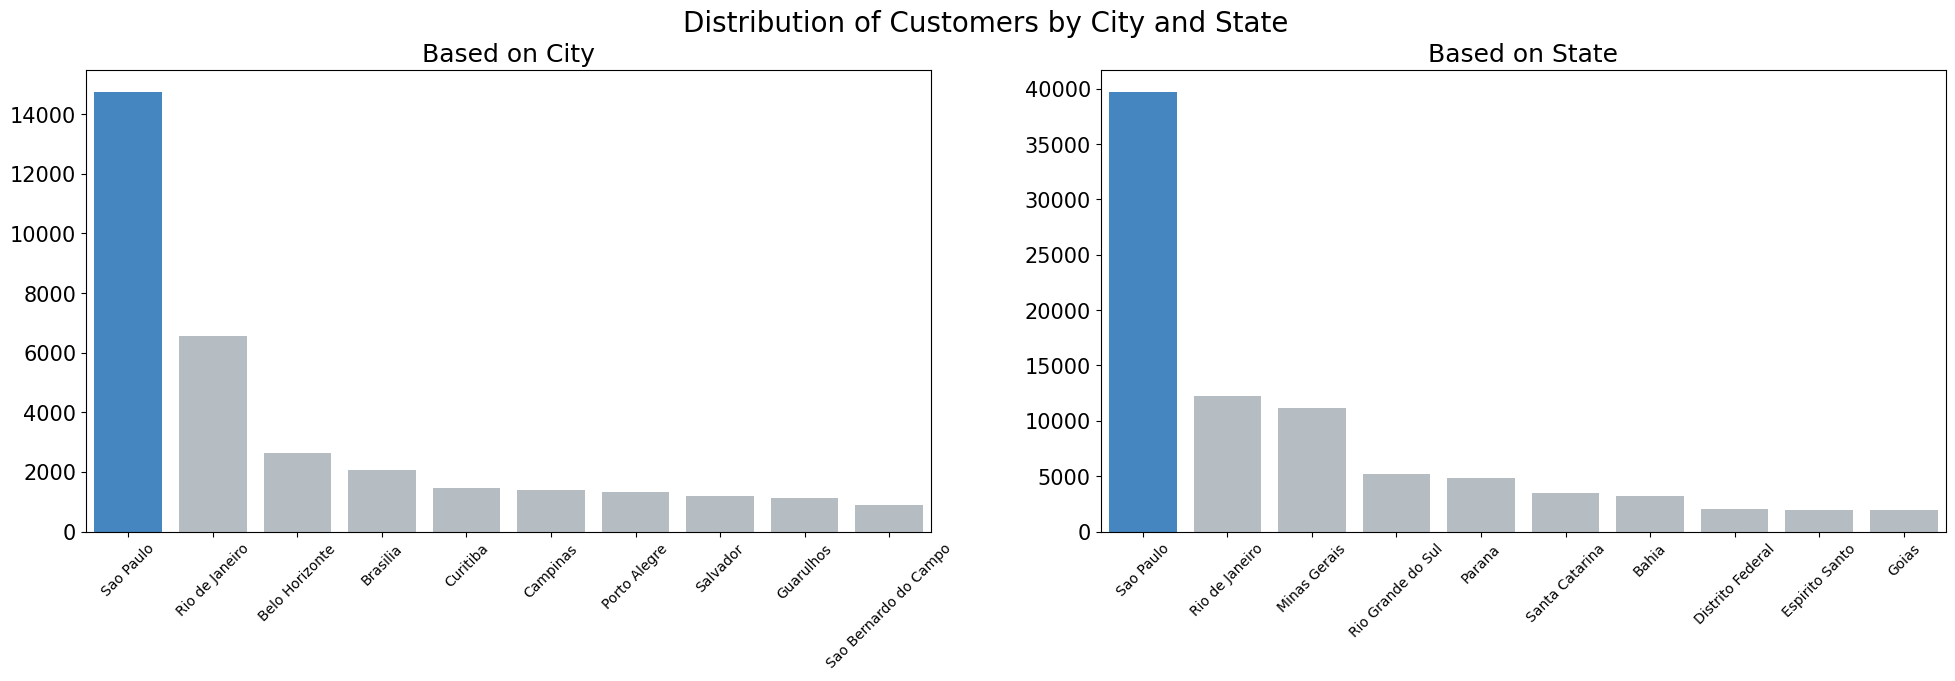

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="customer_city", y="count_customers", data=customers_in_cities, hue="customer_city", palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Based on City", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(x="customer_state", y="count_customers", data=customers_in_states, hue="customer_state", palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Based on State", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Distribution of Customers by City and State", fontsize=20)
plt.show()

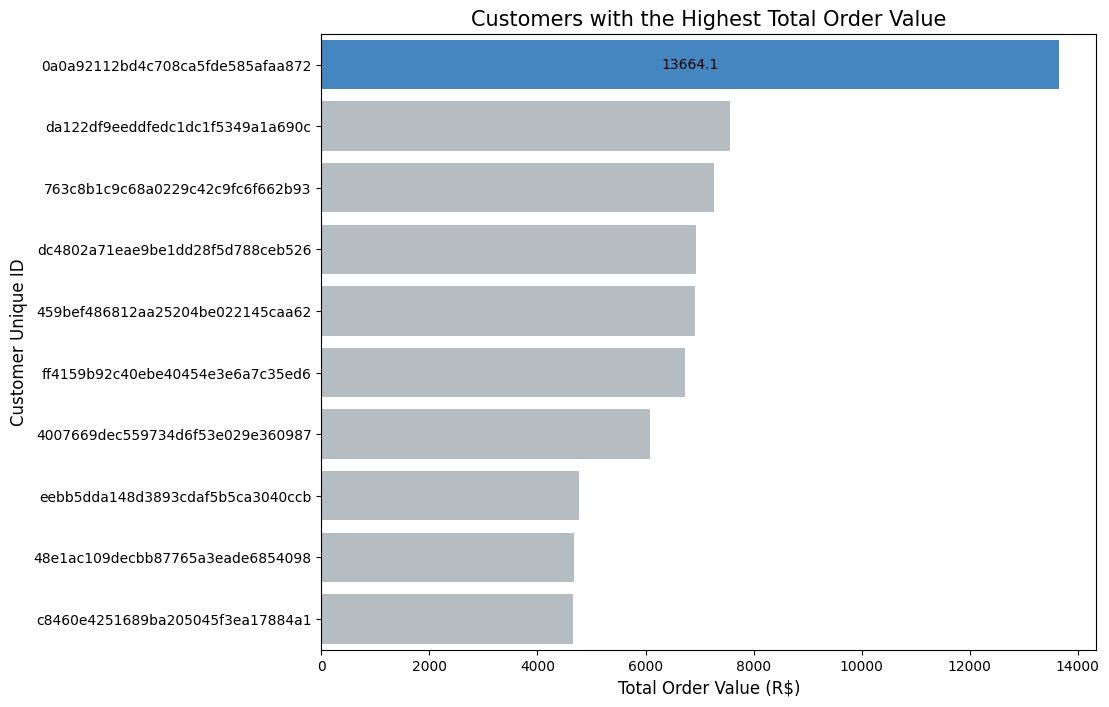

In [150]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="sum_order_value", y="customer_unique_id", data=sum_order_sorted, hue="customer_unique_id", palette=colors, legend=False)
ax.set_ylabel('Customer Unique ID', fontsize=12)
ax.set_xlabel('Total Order Value (R$)', fontsize=12)
ax.set_title("Customers with the Highest Total Order Value", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis='y', labelsize=10)

plt.show()

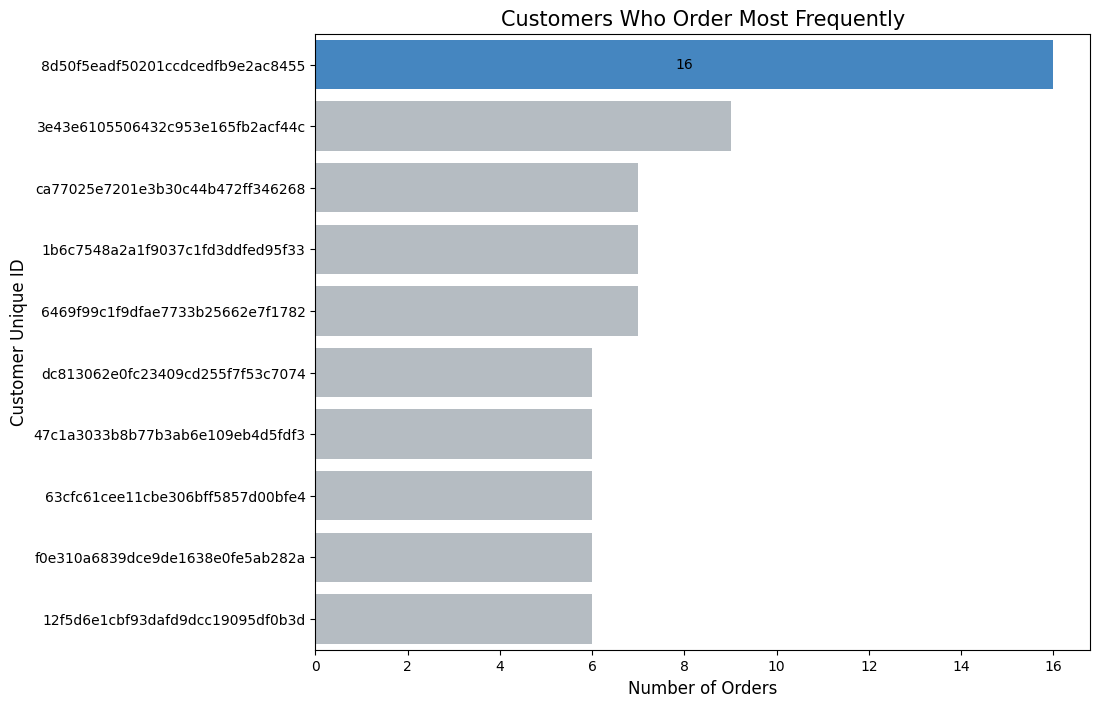

In [152]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="count_order", y="customer_unique_id", data=count_order_sorted, palette=colors, hue="customer_unique_id", legend=False)
ax.set_ylabel('Customer Unique ID', fontsize=12)
ax.set_xlabel('Number of Orders', fontsize=12)
ax.set_title("Customers Who Order Most Frequently", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis='y', labelsize=10)

plt.show()

### What is the distribution of sellers by city and state, and which sellers sell the most products?

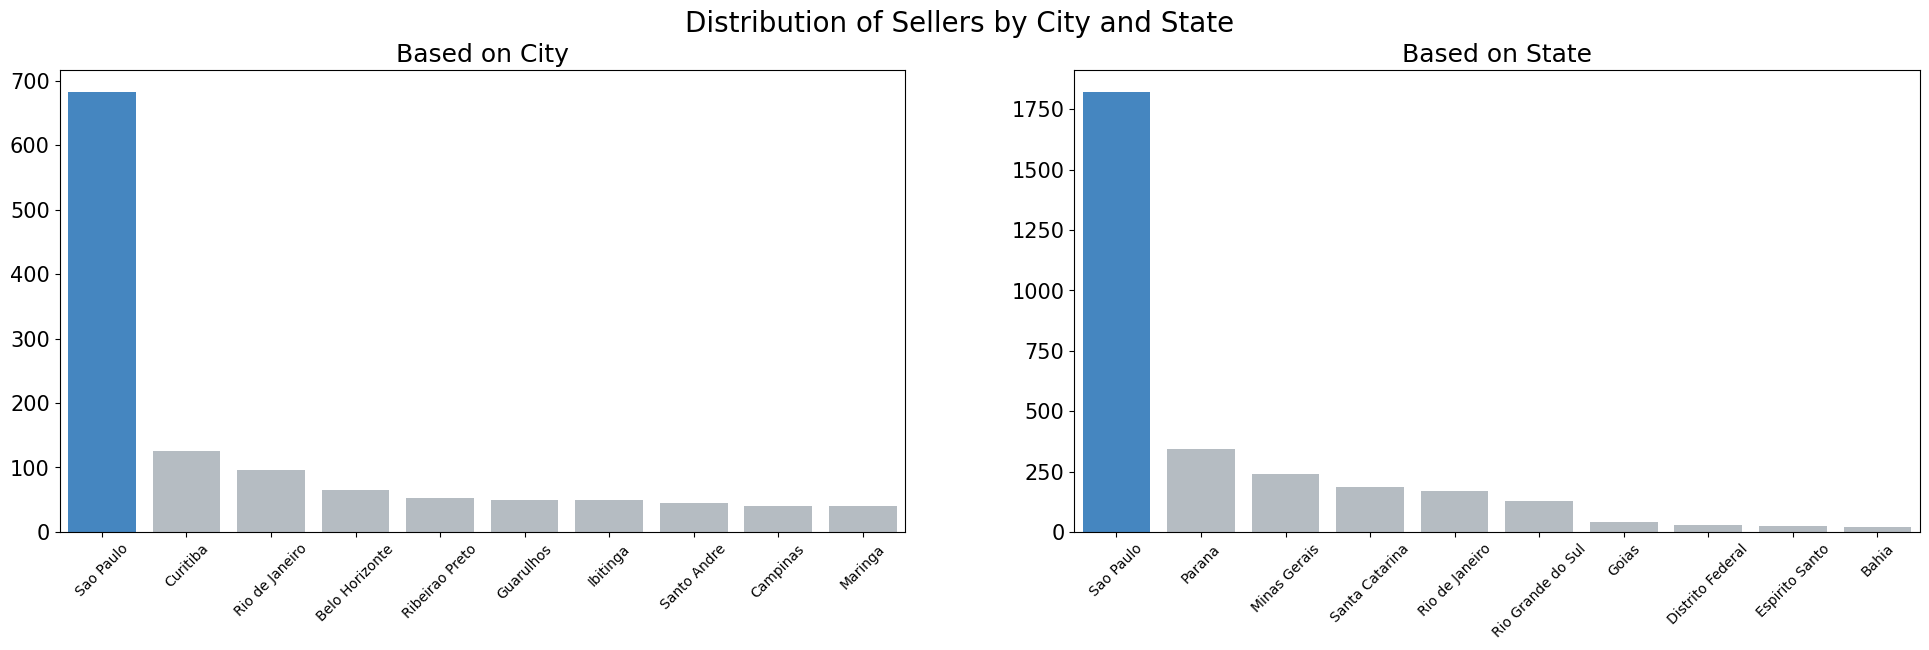

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="seller_city", y="count_sellers", data=sellers_in_cities, hue="seller_city", palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Based on City", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(x="seller_state", y="count_sellers", data=sellers_in_states, hue="seller_state", palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Based on State", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Distribution of Sellers by City and State", fontsize=20)
plt.show()

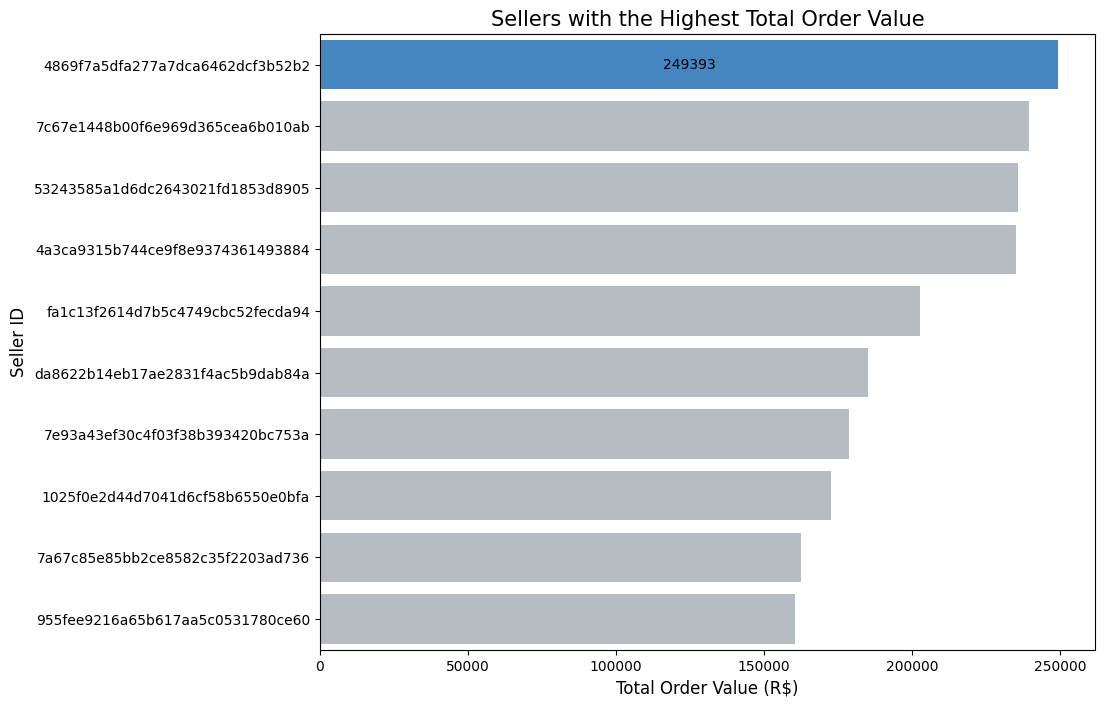

In [154]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="sum_order_value", y="seller_id", data=seller_sum_order_sorted, hue="seller_id", palette=colors, legend=False)
ax.set_ylabel('Seller ID', fontsize=12)
ax.set_xlabel('Total Order Value (R$)', fontsize=12)
ax.set_title("Sellers with the Highest Total Order Value", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis='y', labelsize=10)

plt.show()

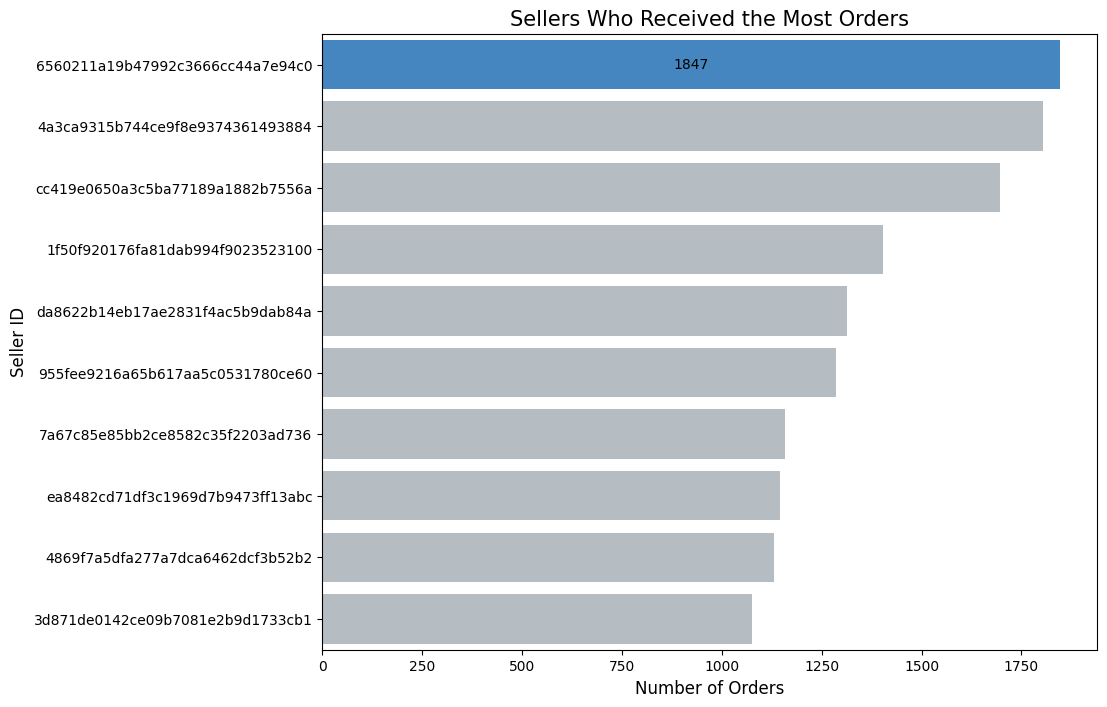

In [155]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="count_order", y="seller_id", data=seller_count_order_sorted, palette=colors, hue="seller_id", legend=False)
ax.set_ylabel('Seller ID', fontsize=12)
ax.set_xlabel('Number of Orders', fontsize=12)
ax.set_title("Sellers Who Received the Most Orders", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis='y', labelsize=10)

plt.show()

### Which product categories are the most and least ordered?

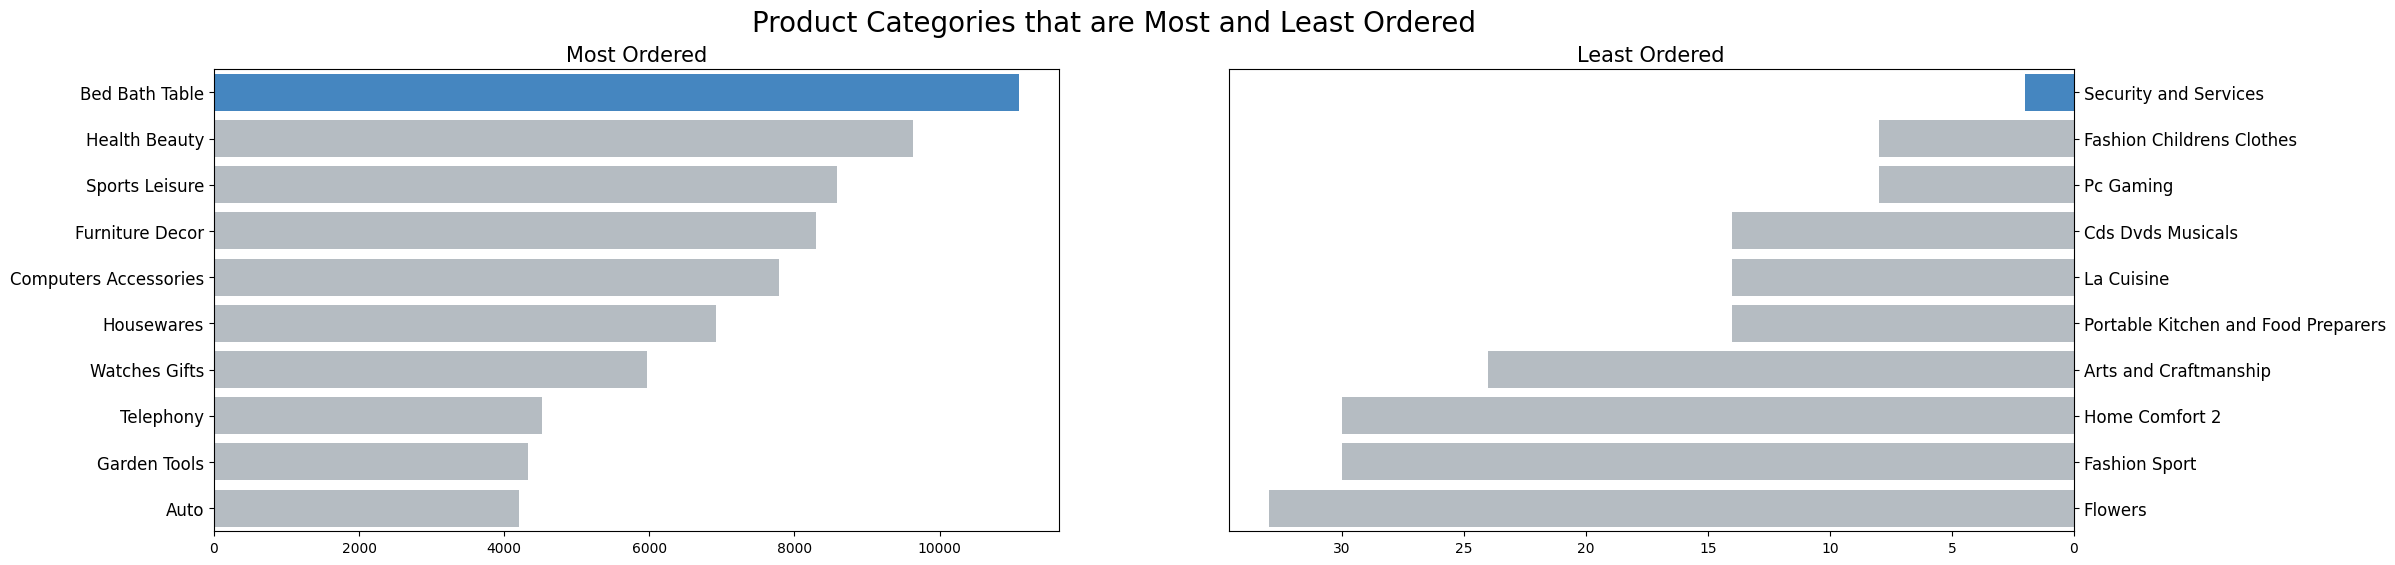

In [157]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

# Most Ordered
sns.barplot(
    x="num_of_order",
    y="product_category",
    data=order_by_product_category.sort_values(by=['num_of_order', 'sum_order_value'], ascending=False).head(10),
    palette=colors,
    hue="product_category",
    legend=False,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most Ordered", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Least Ordered
sns.barplot(
    x="num_of_order",
    y="product_category",
    data=order_by_product_category.sort_values(by=['num_of_order', 'sum_order_value'], ascending=True).head(10),
    palette=colors,
    hue="product_category",
    legend=False,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least Ordered", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Product Categories that are Most and Least Ordered", fontsize=20)
plt.show()


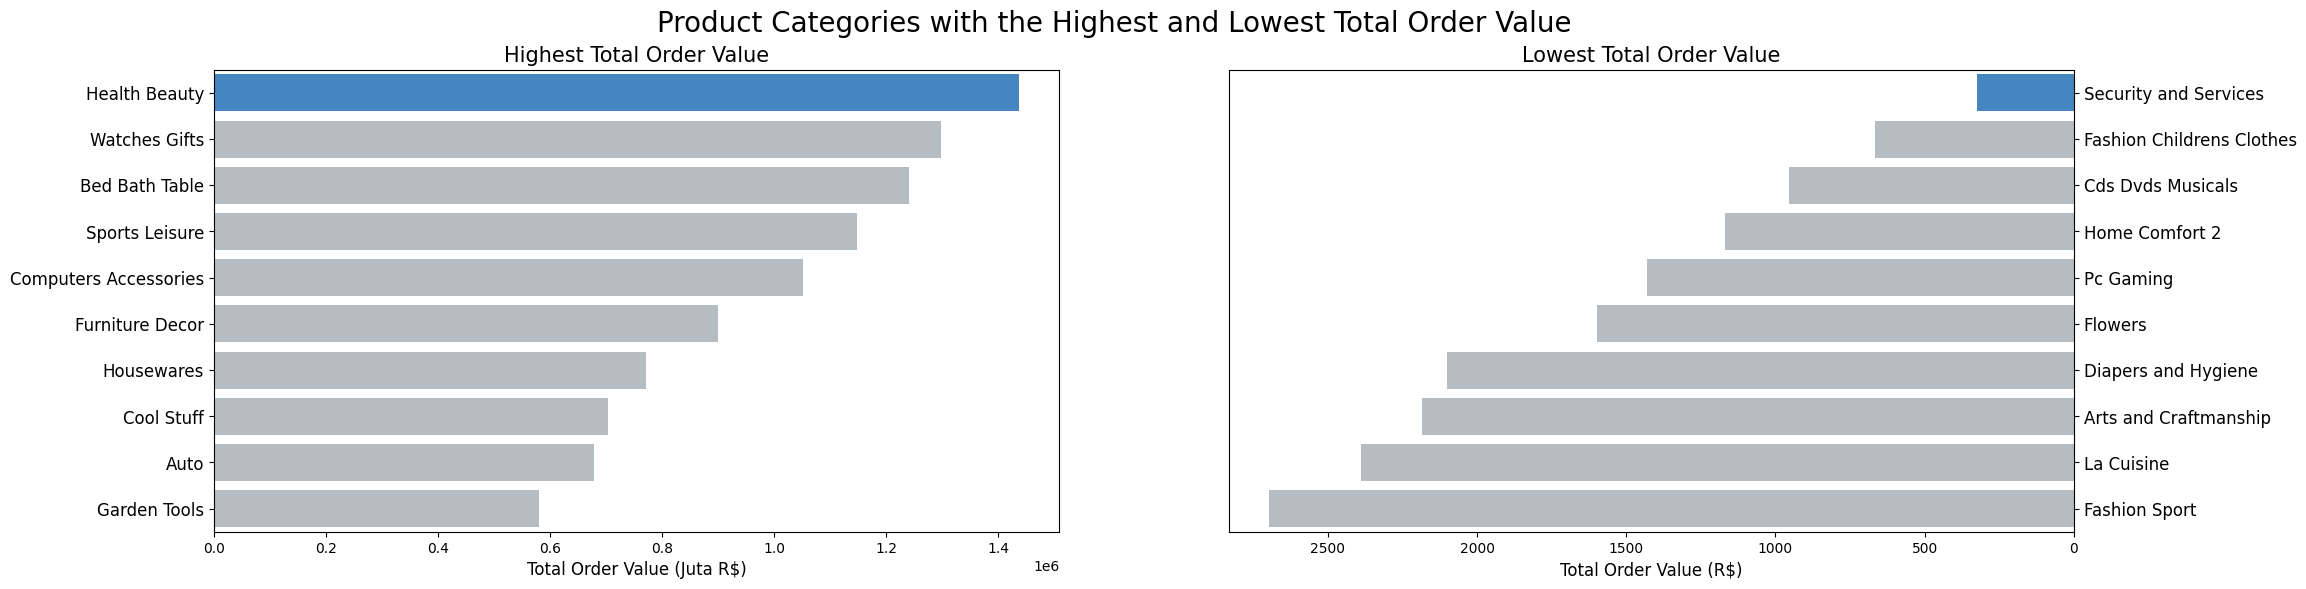

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

# Highest Total Order Value
sns.barplot(
    x="sum_order_value",
    y="product_category",
    data=order_by_product_category.sort_values(by='sum_order_value', ascending=False).head(10),
    palette=colors,
    hue="product_category",
    legend=False,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel('Total Order Value (Juta R$)', fontsize=12)
ax[0].set_title("Highest Total Order Value", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Lowest Total Order Value
sns.barplot(
    x="sum_order_value",
    y="product_category",
    data=order_by_product_category.sort_values(by='sum_order_value', ascending=True).head(10),
    palette=colors,
    hue="product_category",
    legend=False,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel('Total Order Value (R$)', fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Lowest Total Order Value", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Product Categories with the Highest and Lowest Total Order Value", fontsize=20)
plt.show()

## Kesimpulan

- How is the distribution of customers based on city and state, and which customers place orders most frequently?

  answer:
  
  The customers who make the most transactions are from the cities of Sao Paulo and Rio de Janeiro, as well as from the states of Sao Paulo and Rio de Janeiro. The customer who places orders most frequently is the customer with ID 8d50f5eadf50201ccdcedfb9e2ac8455, with an order frequency of 16 times. The customer who spends the most money on orders is the customer with ID 0a0a92112bd4c708ca5fde585afaa872, with a total order value of 13,664.1 Real.

- How is the distribution of sellers based on city and state, and which sellers sell the most products?
  
  answer:

  The majority of sellers come from the cities of Sao Paulo, Curitiba, and Rio de Janeiro, as well as from the states of Sao Paulo, Parana, and Minas Gerais. The seller who receives the most orders is the seller with ID 6560211a19b47992c3666cc44a7e94c0, with a total of 1,847 orders, and the seller with the highest total order value is the seller with ID 4869f7a5dfa277a7dca6462dcf3b52b2, with a total order value of 249,393 Real.


- Which product categories are ordered the most and the least?

  answer:

  Based on the number of orders, the most ordered product categories are Bed Bath Table, Health Beauty, and Sports Leisure, while the least ordered are Security and Services, PC Gaming, and Fashion Children's Clothes. Meanwhile, based on the total order value, the product categories with the highest total order value are Health Beauty, Watches Gifts, and Bed Bath Table, whereas the categories with the lowest total order value are Security and Services, Fashion Children's Clothes, and CDs DVDs Musical.



In [163]:
all_joined_df.to_csv('main_data_for_dashboard.csv', index=False)